In [1]:
from PIL import Image
import numpy as np
import sys
import os
import csv
import cv2
import tensorflow as tf


In [2]:
path ='D:\\Dataset\\archive\\dataset\\train'
myList= os.listdir(path)
print(myList)

['fifty', 'five', 'fivehundred', 'hundred', 'ten', 'thousand', 'twenty']


In [3]:
noofClasses=len(myList)
print(noofClasses)

7


In [4]:
paths = ['D:\\Dataset\\archive\\dataset\\train\\fifty',
         'D:\\Dataset\\archive\\dataset\\train\\five',
         'D:\\Dataset\\archive\\dataset\\train\\fivehundred',
         'D:\\Dataset\\archive\\dataset\\train\\hundred', 
         'D:\\Dataset\\archive\\dataset\\train\\ten',
         'D:\\Dataset\\archive\\dataset\\train\\thousand',
         'D:\\Dataset\\archive\\dataset\\train\\twenty']
images = []
classNo = []


In [5]:
# for x in range (0, noofClasses):
#    PicList = os.listdir(paths[x])
        
#    for y in PicList:
#     Img = cv2.imread(paths[x]+"/"+y)
    
#     Img = cv2.resize(Img, (32,32))
#     images.append(Img)
#     classNo.append(x)
#    print (x)
           
           
# print(len(images))

In [6]:
# images = np.array(images)
# classNo = np.array(classNo)


In [7]:
# savepath1= 'D:\\Saved\\image.npy'
# savepath2='D:\\Saved\\classn.npy'
# np.save(savepath1,images)
# np.save(savepath2,classNo)

In [8]:
savepath1= 'D:\\Saved\\image.npy'
savepath2='D:\\Saved\\classn.npy'
images = np.load(savepath1, allow_pickle=True)
classNo=np.load(savepath2,allow_pickle=True)

In [9]:
print(images.shape)
print(classNo.shape)

(16812, 32, 32, 3)
(16812,)


In [10]:
validpaths = ['D:\\Dataset\\archive\\dataset\\valid\\fifty',
         'D:\\Dataset\\archive\\dataset\\valid\\five',
         'D:\\Dataset\\archive\\dataset\\valid\\fivehundred',
         'D:\\Dataset\\archive\\dataset\\valid\\hundred', 
         'D:\\Dataset\\archive\\dataset\\valid\\ten',
         'D:\\Dataset\\archive\\dataset\\valid\\thousand',
         'D:\\Dataset\\archive\\dataset\\valid\\twenty']
valimages = []
valclassNo = []


In [11]:
# for x in range (0, noofClasses):
#    valPicList = os.listdir(validpaths[x])

#    for y in valPicList:
#        curImg = cv2.imread(validpaths[x]+"/"+y)
#        curImg = cv2.resize(curImg, (32,32))
#        valimages.append(curImg)
#        valclassNo.append(x)
#     print (x)
# print(len(valimages))

In [12]:
#savepath3= 'D:\\Saved\\valimage.npy'
#savepath4='D:\\Saved\\valclassn.npy'
#np.save(savepath3,valimages)
#np.save(savepath4,valclassNo)

In [13]:
savepath3= 'D:\\Saved\\valimage.npy'
savepath4='D:\\Saved\\valclassn.npy'
valimages = np.load(savepath3, allow_pickle=True)
valclassNo=np.load(savepath4,allow_pickle=True)

In [14]:
valimages = np.array(valimages)
valclassNo = np.array(valclassNo)
print(valimages.shape)
print(valclassNo.shape)

(3334, 32, 32, 3)
(3334,)


In [15]:
#Splitting the data into training and validation
from sklearn.model_selection import train_test_split
testRatio = 0.2

In [16]:
X_valid, y_valid= valimages, valclassNo
print(X_valid.shape)
print(y_valid.shape)



(3334, 32, 32, 3)
(3334,)


In [17]:
X_train,X_test, y_train,y_test = train_test_split(images,classNo,test_size=testRatio,random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(13449, 32, 32, 3)
(3363, 32, 32, 3)
(13449,)
(3363,)


In [18]:
numofSamples =[]
for x in range (0, noofClasses):
    #print(len(np.where(y_train==x)[0]))
    #print(len(np.where(y_test==x)[0]))
    #print(len(np.where(y_valid==x)[0]))
    numofSamples.append(len(np.where(y_train==x)[0]))
print(numofSamples)
#print(y_train)
#print(len(np.where(y_train==0)[0]))
#print(y_train[0])


[2071, 1380, 1894, 1980, 2178, 1937, 2009]


In [19]:
#plotting the sdistribution
import matplotlib.pyplot as plt

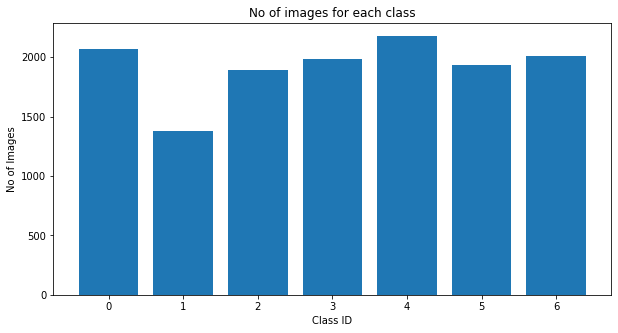

In [20]:
plt.figure(figsize=(10,5))
plt.bar(range(0, noofClasses), numofSamples)
plt.title("No of images for each class")
plt.xlabel("Class ID")
plt.ylabel("No of Images")
plt.show()

In [21]:
#PreProcessing Function
def preProcessing(img):
    img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img=cv2.equalizeHist(img)
    img=img/255
    return img


In [22]:
#img= X_train[0]
#img=cv2.resize(img,(300,300))
#cv2.imshow("Preprocessed",img)
#cv2.waitKey(0)
X_train= np.array(list(map(preProcessing, X_train)))
X_test= np.array(list(map(preProcessing, X_test)))
X_valid= np.array(list(map(preProcessing, X_valid)))


In [23]:

X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],X_train.shape[2],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],X_test.shape[2],1)
X_valid = X_valid.reshape(X_valid.shape[0],X_valid.shape[1],X_valid.shape[2],1)
print(X_train.shape)
print(X_test.shape)
print(y_valid.shape)

(13449, 32, 32, 1)
(3363, 32, 32, 1)
(3334,)


In [24]:
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D,Dropout
from keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam

In [25]:
# dataGen = ImageDataGenerator(width_shift_range=0.1,
#                             height_shift_range=0.1,
#                             zoom_range=0.2,
#                             shear_range=0.1,
#                             rotation_range=10)
# dataGen.fit(X_train)

In [26]:
#OneHotEncoding
from keras.utils.np_utils import to_categorical

In [27]:
print(y_train)
print(y_train.shape)


[3 0 5 ... 2 5 0]
(13449,)


In [28]:
y_train= to_categorical(y_train, noofClasses)
y_test= to_categorical(y_test, noofClasses)
y_valid= to_categorical(y_valid, noofClasses)

In [29]:
print(y_train)
print(y_valid.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [1. 0. 0. ... 0. 0. 0.]]
(3334, 7)


In [30]:

#mymodelusinglenet
def myModel():
    noOfFilters=80
    sizeOfFilter1=(5,5)
    sizeOfFilter2=(3,3)
    sizeOfPool=(2,2)
    noOfNode =100
    model= Sequential()
    model.add((Conv2D(noOfFilters,sizeOfFilter1,input_shape=(32,32,1),activation= 'relu')))
    model.add((Conv2D(noOfFilters,sizeOfFilter1,activation= 'relu')))
    model.add(MaxPooling2D(pool_size=sizeOfPool))
    model.add((Conv2D(noOfFilters//2,sizeOfFilter2,activation= 'relu')))
    model.add((Conv2D(noOfFilters//2,sizeOfFilter2,activation= 'relu')))
    model.add((Conv2D(noOfFilters//2,sizeOfFilter2,activation= 'relu')))
    model.add(MaxPooling2D(pool_size=sizeOfPool))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(noOfNode,activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(noofClasses,activation='softmax'))
    model.compile(Adam(learning_rate=0.00001), loss='categorical_crossentropy',metrics=['accuracy'])
    return model

In [31]:
model= myModel()
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 80)        2080      
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 80)        160080    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 80)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 40)        28840     
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 40)          14440     
                                                                 
 conv2d_4 (Conv2D)           (None, 6, 6, 40)          14440     
                                                        

In [32]:
batchSizeVal=16
epochsVal=10

In [33]:
print(X_train.shape)

(13449, 32, 32, 1)


In [34]:
testmodel= keras.models.load_model("my_first.h5")

In [40]:
history= testmodel.fit(X_train,y_train,epochs=epochsVal,batch_size = batchSizeVal,
             validation_data= (X_test, y_test))

Epoch 1/10
841/841 [==============================] - 7s 8ms/step - loss: 0.5902 - accuracy: 0.7911 - val_loss: 0.6651 - val_accuracy: 0.7835
Epoch 2/10
841/841 [==============================] - 6s 7ms/step - loss: 0.5839 - accuracy: 0.7931 - val_loss: 0.6799 - val_accuracy: 0.7767
Epoch 3/10
841/841 [==============================] - 6s 7ms/step - loss: 0.5802 - accuracy: 0.7905 - val_loss: 0.6862 - val_accuracy: 0.7835
Epoch 4/10
841/841 [==============================] - 6s 7ms/step - loss: 0.5758 - accuracy: 0.7950 - val_loss: 0.6635 - val_accuracy: 0.7817
Epoch 5/10
841/841 [==============================] - 6s 8ms/step - loss: 0.5762 - accuracy: 0.7975 - val_loss: 0.7041 - val_accuracy: 0.7666
Epoch 6/10
841/841 [==============================] - 7s 8ms/step - loss: 0.5978 - accuracy: 0.7911 - val_loss: 0.7415 - val_accuracy: 0.7517
Epoch 7/10
841/841 [==============================] - 7s 8ms/step - loss: 0.5951 - accuracy: 0.7908 - val_loss: 0.7081 - val_accuracy: 0.7612
Epoch 

In [41]:

accuracy,loss= testmodel.evaluate(X_valid,y_valid,batch_size= batchSizeVal)
score=testmodel.evaluate(X_valid,y_valid)

105/105 [==============================] - 0s 3ms/step - loss: 2.0946 - accuracy: 0.3968


In [42]:
testmodel.save("my_first.h5")

['Test_1.jpg']
(1, 32, 32, 3)


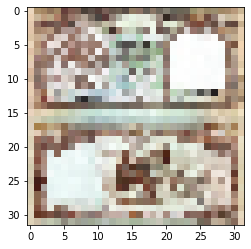

In [43]:
testimages=[]
testClassNo=[]
test_path="C:\\Users\\Dell\\Desktop\\Minor\\test"
nooftest=len(os.listdir(test_path))
print(os.listdir(test_path))
for x in range (0, nooftest):
   myPicList = os.listdir(test_path)
   for y in myPicList:
       curImg = cv2.imread(test_path+"/"+y)
       curImg = cv2.resize(curImg, (32,32))
       plt.imshow(curImg)

       testimages.append(curImg)
       testClassNo.append(x)
testimages= np.array(testimages)
testClassNo=np.array(testClassNo)
print (testimages.shape)

[[9.9293691e-01 1.1612047e-03 1.6481553e-03 3.7681055e-03 4.3294363e-04
  3.6020723e-05 1.6671791e-05]]
0


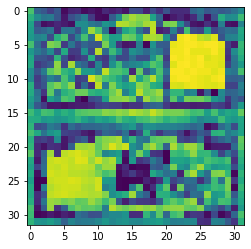

In [44]:
testimages= preProcessing(testimages[0])
plt.imshow(testimages)
testimages= testimages.reshape(1,testimages.shape[0],testimages.shape[1],1)

predictions= testmodel.predict(testimages)
print(predictions)
probvalue= np.argmax(predictions)
print (probvalue)

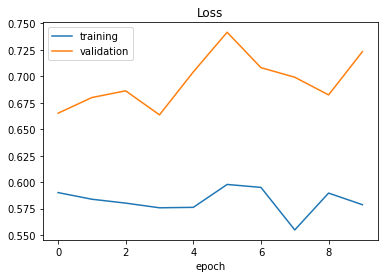

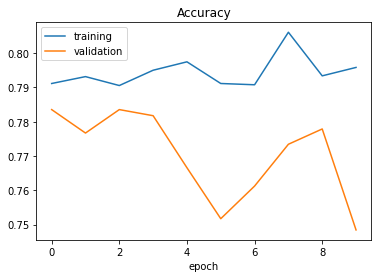

Test Score = 2.0946218967437744
Test Accuracy = 0.39682063460350037


In [45]:
plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('Loss')
plt.xlabel('epoch')
plt.figure(2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.show()
print('Test Score =',score[0])
print('Test Accuracy =',score[1])